### Import dataset & library



In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
transaction = pd.read_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/raw_data/fact__paper__digital_payment_transaction.csv', parse_dates=['transaction_created_datetime','transaction_updated_datetime'])
request = pd.read_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/raw_data/fact__paper__digital_payment_request.csv')
promotion = pd.read_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/raw_data/dim__paper__promotion.csv')
user = pd.read_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/raw_data/dim__paper__company.csv', parse_dates=['company_registered_datetime'])

### Dataframe info

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dpt_id                        50000 non-null  object        
 1   dpt_promotion_id              937 non-null    object        
 2   buyer_id                      50000 non-null  object        
 3   seller_id                     50000 non-null  object        
 4   transaction_amount            50000 non-null  float64       
 5   payment_method_name           50000 non-null  object        
 6   payment_provider_name         50000 non-null  object        
 7   transaction_created_datetime  50000 non-null  datetime64[ns]
 8   transaction_updated_datetime  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 3.4+ MB


In [ ]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dpt_promotion_id                   937 non-null    object 
 1   promotion_code                     645 non-null    object 
 2   promotion_name                     645 non-null    object 
 3   transaction_promo_cashback_amount  50000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   company_id                   50000 non-null  object        
 1   company_kyc_status_name      50000 non-null  object        
 2   company_kyb_status_name      50000 non-null  object        
 3   company_type_group           49999 non-null  object        
 4   company_phone_verified_flag  50000 non-null  float64       
 5   company_email_verified_flag  50000 non-null  float64       
 6   user_fraud_flag              50000 non-null  float64       
 7   testing_account_flag         50000 non-null  float64       
 8   blacklist_account_flag       50000 non-null  float64       
 9   package_active_name          50000 non-null  object        
 10  company_registered_datetime  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(

In [ ]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dpt_id              50000 non-null  object 
 1   total_fee_amount    50000 non-null  float64
 2   document_type_name  50000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


### Menghapus data duplikat

In [4]:
transaction.drop_duplicates(inplace=True)
transaction.reset_index(drop=True, inplace=True)

request.drop_duplicates(inplace=True)
request.reset_index(drop=True, inplace=True)

promotion.drop_duplicates(inplace=True)
promotion.reset_index(drop=True, inplace=True)

user.drop_duplicates(inplace=True)
user.reset_index(drop=True, inplace=True)

### Dataframe info

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dpt_id                        50000 non-null  object        
 1   dpt_promotion_id              937 non-null    object        
 2   buyer_id                      50000 non-null  object        
 3   seller_id                     50000 non-null  object        
 4   transaction_amount            50000 non-null  float64       
 5   payment_method_name           50000 non-null  object        
 6   payment_provider_name         50000 non-null  object        
 7   transaction_created_datetime  50000 non-null  datetime64[ns]
 8   transaction_updated_datetime  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 3.4+ MB


In [ ]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dpt_promotion_id                   728 non-null    object 
 1   promotion_code                     519 non-null    object 
 2   promotion_name                     519 non-null    object 
 3   transaction_promo_cashback_amount  729 non-null    float64
dtypes: float64(1), object(3)
memory usage: 22.9+ KB


In [5]:
promotion[promotion['dpt_promotion_id'].isna()][['promotion_code', 'promotion_name', 'transaction_promo_cashback_amount']]

,promotion_code,promotion_name,transaction_promo_cashback_amount
0,NaN,NaN,0.0


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   company_id                   9527 non-null   object        
 1   company_kyc_status_name      9527 non-null   object        
 2   company_kyb_status_name      9527 non-null   object        
 3   company_type_group           9526 non-null   object        
 4   company_phone_verified_flag  9527 non-null   float64       
 5   company_email_verified_flag  9527 non-null   float64       
 6   user_fraud_flag              9527 non-null   float64       
 7   testing_account_flag         9527 non-null   float64       
 8   blacklist_account_flag       9527 non-null   float64       
 9   package_active_name          9527 non-null   object        
 10  company_registered_datetime  9527 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(5)

In [ ]:
user['company_type_group'].unique()

array(['PERORANGAN', 'PT', 'CV', 'KOPERASI', 'FIRMA', 'LAINNYA', nan],
      dtype=object)

In [ ]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dpt_id              50000 non-null  object 
 1   total_fee_amount    50000 non-null  float64
 2   document_type_name  50000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


# Handling missing values



### Imputasi nilai kosong

In [6]:
transaction['dpt_promotion_id'] = transaction['dpt_promotion_id'].fillna("no promotion")

promotion.dropna(subset=['dpt_promotion_id'], inplace=True)

promotion['promotion_code'] = promotion.apply(
    lambda row: 'no promotion' if row['dpt_promotion_id'] == 'no promotion' else
                'unknown' if pd.isna(row['promotion_code']) else row['promotion_code'], axis=1
)

promotion['promotion_name'] = promotion.apply(
    lambda row: 'no promotion' if row['dpt_promotion_id'] == 'no promotion' else
                'unknown' if pd.isna(row['promotion_name']) else row['promotion_name'], axis=1
)

user['company_type_group'] = user['company_type_group'].fillna("unknown")

### Datataframe info setelah cleaning

In [11]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dpt_id                        50000 non-null  object        
 1   dpt_promotion_id              50000 non-null  object        
 2   buyer_id                      50000 non-null  object        
 3   seller_id                     50000 non-null  object        
 4   transaction_amount            50000 non-null  float64       
 5   payment_method_name           50000 non-null  object        
 6   payment_provider_name         50000 non-null  object        
 7   transaction_created_datetime  50000 non-null  datetime64[ns]
 8   transaction_updated_datetime  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 3.4+ MB


In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   company_id                   9527 non-null   object        
 1   company_kyc_status_name      9527 non-null   object        
 2   company_kyb_status_name      9527 non-null   object        
 3   company_type_group           9527 non-null   object        
 4   company_phone_verified_flag  9527 non-null   float64       
 5   company_email_verified_flag  9527 non-null   float64       
 6   user_fraud_flag              9527 non-null   float64       
 7   testing_account_flag         9527 non-null   float64       
 8   blacklist_account_flag       9527 non-null   float64       
 9   package_active_name          9527 non-null   object        
 10  company_registered_datetime  9527 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(5)

In [13]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dpt_id              50000 non-null  object 
 1   total_fee_amount    50000 non-null  float64
 2   document_type_name  50000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [14]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 1 to 728
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dpt_promotion_id                   728 non-null    object 
 1   promotion_code                     728 non-null    object 
 2   promotion_name                     728 non-null    object 
 3   transaction_promo_cashback_amount  728 non-null    float64
dtypes: float64(1), object(3)
memory usage: 28.4+ KB


# Handle Outliers/Anomalies

### Cek nilai transaksi tidak wajar

In [ ]:
transaksi_sangat_besar = transaction[transaction['transaction_amount'] > transaction['transaction_amount'].quantile(0.99)].sort_values(by='transaction_amount', ascending=False)
transaksi_sangat_besar.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
4042,f620ec3ab2a4092ec1ea1d0913f0cc8b99d5ac448d77ee...,no promotion,dd9a9195c84e334de861047a82118fd24ada1030d0688b...,dd9a9195c84e334de861047a82118fd24ada1030d0688b...,2.014010e+10,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-04-14 07:54:50.944876,2023-04-14 07:54:50.944876
24711,370726921779cab6f5549c6ceb07eeed512d3421c57b4d...,no promotion,684498b47bbfc0c818171bdeb0af99a4a1ab34d023f324...,684498b47bbfc0c818171bdeb0af99a4a1ab34d023f324...,1.301980e+09,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-09-12 19:36:30.259651,2023-09-12 20:32:33.459043
2805,6231f3f84aad71a047a898cb0fcea813316935d7605a8e...,no promotion,684498b47bbfc0c818171bdeb0af99a4a1ab34d023f324...,684498b47bbfc0c818171bdeb0af99a4a1ab34d023f324...,1.301980e+09,BANK_TRANSFER,MANDIRI,2023-10-02 05:19:58.957900,2023-10-02 05:19:58.957900
27534,d0ad5837ab847e4dd426e48b9c4d89440de2c0e5aeac92...,no promotion,12a88e2f60b5b65f45055c1f6cce54a589f8c1b6779436...,12a88e2f60b5b65f45055c1f6cce54a589f8c1b6779436...,1.075141e+09,BANK_TRANSFER,BCA_MANUAL,2023-11-10 15:19:49.191761,2023-11-10 15:21:47.619639
44955,42b3f4601577ab9fb954f34cd3b6cc74e8b742d2ae5c35...,no promotion,12a88e2f60b5b65f45055c1f6cce54a589f8c1b6779436...,12a88e2f60b5b65f45055c1f6cce54a589f8c1b6779436...,9.999991e+08,BANK_TRANSFER,BCA_MANUAL,2023-12-01 08:18:19.867666,2023-12-01 08:21:07.452084


Terdapat 3 nilai transaksi sebesar 10 digit dan 1 transaksi sebesar 11 digit

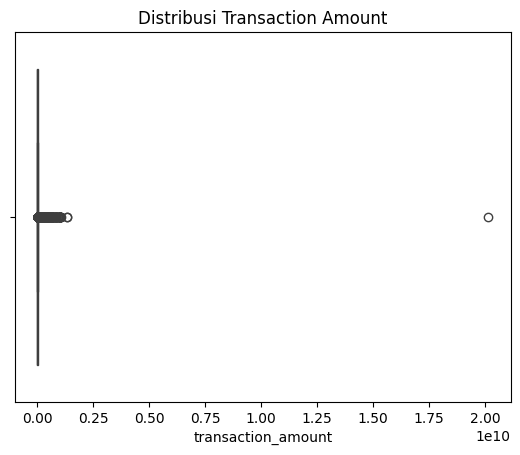

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=transaction['transaction_amount'])
plt.title("Distribusi Transaction Amount")
plt.show()

Nilai transaksi sangat tinggi dan tidak wajar tidak dihapus karena diasumsikan dapat memberikan petunjuk perilaku mencurigakan

### Cek buyer dengan frekuensi transaksi tinggi


In [ ]:
buyer_frequency = transaction.groupby('buyer_id').size().reset_index(name='count')
buyer_frequency[buyer_frequency['count'] > 100].sort_values(by='count', ascending=False)

,buyer_id,count
443,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,1266
6715,b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...,517
83,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,401
650,10f3200ad77826457a7b33726d1ec95de21ee6400745aa...,321
1961,34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...,294
5526,9506dece8982a8d50fbb2924dd510825ea1516c19852aa...,261
1249,2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...,248
8274,df43724682fbd651e549d3e2043a9d0d2cc4700545863a...,243
8275,df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...,218
270,0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...,210


Terdapat 30 buyer melakukan transaksi lebih dari 100 kali

Akan dilakukan analisis lebih lanjut terkait buyer dengan frekuensi transaksi sangat tinggi

### Cek pasangan buyer-seller dengan frekuensi transaksi tinggi

In [ ]:
unique_pairs_count = transaction.groupby(['buyer_id', 'seller_id']).size().reset_index(name='count')
unique_pairs_count[unique_pairs_count['count'] > 100].sort_values(by='count', ascending=False).reset_index()

,index,buyer_id,seller_id,count
0,470,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,1266
1,698,10f3200ad77826457a7b33726d1ec95de21ee6400745aa...,10f3200ad77826457a7b33726d1ec95de21ee6400745aa...,321
2,2112,34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...,34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...,294
3,7292,b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,294
4,5998,9506dece8982a8d50fbb2924dd510825ea1516c19852aa...,9506dece8982a8d50fbb2924dd510825ea1516c19852aa...,261
5,1349,2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...,2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...,248
6,8984,df43724682fbd651e549d3e2043a9d0d2cc4700545863a...,df43724682fbd651e549d3e2043a9d0d2cc4700545863a...,243
7,91,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,216
8,8985,df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,215
9,290,0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,210


Terdapat 32 pasangan buyer-seller yang melakukan transaksi lebih dari 100 kali,kemudian ada 1 pasangan buyer-seller yang melakukan transaksi lebih dari 1000 kali

Akan dilakukan analisis lebih lanjut terkait pasangan buyer-seller dengan frekuensi transaksi sangat tinggi

# Identifying suspicious missing data & inconsistencies in fraud-related columns



### Cek keberadaan user tidak terdaftar

In [ ]:
missing_buyers = transaction[~transaction['buyer_id'].isin(user['company_id'])]
missing_buyers['buyer_id'].value_counts().reset_index()

,buyer_id,count


In [ ]:
missing_sellers = transaction[~transaction['seller_id'].isin(user['company_id'])]
missing_sellers['seller_id'].value_counts().reset_index()

,seller_id,count
0,f0c9669d6f2a1f6512c1b3e4f31db09d50247a213ebf32...,88
1,337e8760fa5dc1bf803596fa7388cc238305e8f94e6ac9...,18
2,193366304757172f73ad6e3b18d5c569df9edd725d715a...,6
3,4cd780b69daf160a1aac7e0fa3b6e72aad8b68bc5e59a4...,6
4,f1177513224ada4449fc45f94de3773f823f7eeecba271...,6
...,...,...
313,eebf8cd63c8f68966811916a823efdd4ac0f841dc5ddcf...,1
314,cca5e1e9acd86a9ce7fb5aa02fc874106380438a7e575d...,1
315,2f0b843f5fa86484c9b86f2967d1f1b38f966c391b1336...,1
316,405999843816125a069366c16022f611a23986ee685f1f...,1


Terdapat 318 user tidak terdaftar yang melakukan transaksi sebagai seller

### Cek user terdeteksi fraud tetapi tidak di-blacklist

In [16]:
fraud_not_blacklisted = user[(user['user_fraud_flag'] == 1) & (user['blacklist_account_flag'] == 0)].reset_index()
fraud_not_blacklisted

,index,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,29,564d7304454d3552840f7483fd97b859319b4ba703e735...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-07-29 12:27:43
2,33,1cd7c6221d8919d6b0113eb17ab64ec31442189a6e635a...,AKUN_DIBEKUKAN,VALIDASI_BERHASIL,PT,1.0,1.0,1.0,0.0,0.0,FREE,2022-10-16 02:41:49
3,53,d76c958f4e0dd86f00a166da4c5d11d13f2a144a21f308...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,PAPER+ ONE MONTH,2022-12-18 03:37:47
4,55,25254fe39611d129f85367f800017c529900ec1b271206...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-08-21 04:16:56
...,...,...,...,...,...,...,...,...,...,...,...,...
655,9441,e61195cb671e883ce2884769f8ae846df844bff2bf183c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-08-18 15:54:13
656,9442,2cdea4a36287bf705eb1a56d89181c1827671729214fd9...,AKUN_DIBEKUKAN,VALIDASI_BERHASIL,CV,1.0,1.0,1.0,0.0,0.0,FREE,2023-07-24 12:44:03
657,9484,75f4a5067bc1d544cd0c5fd0e712512f0d58a8ef5fea1f...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-10-16 17:52:12
658,9508,93241742aba8b8fa511881d55423f062745c5aa987e7fc...,AKUN_DIBEKUKAN,VALIDASI_BERHASIL,PT,1.0,1.0,1.0,0.0,0.0,FREE,2023-06-04 22:41:07


Terdapat 660 user terdeteksi fraud tetapi tidak di-blacklist. Mungkin karena ada threshold frekuensi transaksi fraud tertentu agar user di blacklist.Namun, ada kemungkinan juga sistem diretas. Oleh karena itu, perlu dilakukan analisis lebih lanjut.

### Cek user terdeteksi fraud tetapi kyc tidak dibekukan

In [25]:
 fraud_kyc_tidak_dibekukan = user[(user['user_fraud_flag'] == 1) & (user['company_kyc_status_name'] != 'AKUN_DIBEKUKAN')].reset_index()
 fraud_kyc_tidak_dibekukan

,index,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,1512,d31f121a1f052b1c166abcde835c6b085a7ed12cc06cb1...,DOKUMEN_KURANG_LENGKAP,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-01-02 22:12:02
1,1906,a63f475f98b013b556e2ecb17d18d36ff5056e7a17bc8d...,VALIDASI_BERHASIL,VALIDASI_BERHASIL,PT,1.0,1.0,1.0,0.0,0.0,FREE,2023-01-06 00:04:05
2,2328,d7d2a019843f52d0411d17e7fb294611a0a7931b48b84d...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-07-21 03:35:31
3,2784,8e1f496890fe2e11c736887899866d48bd87444f8b7b4b...,DOKUMEN_KURANG_LENGKAP,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-11-12 23:52:11
4,4146,3a87a65a3cabe4ef5d30d4e854fe9e6c0abc6847ce3dfe...,DOKUMEN_KURANG_LENGKAP,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-05-26 21:48:32
5,4165,e87aaf67df3949294046d695d4e9f9c6ca0819b664a8e1...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2021-11-05 07:13:37
6,4285,5b59faeca7520ec286ca8d9b5fb69c4ec3e735d77e3ca6...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,PAPER+ THREE MONTHS,2022-09-29 16:31:22
7,4292,3a245609d3be3e71aa22be1394ff95be38caf2b72087d1...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-04-04 21:55:01
8,4936,482026f7b35201b8eebc60ebe0b4a48f42e12940ac3800...,BELUM_VALIDASI,BELUM_VALIDASI,PT,1.0,1.0,1.0,0.0,0.0,FREE,2022-11-22 18:19:58
9,6821,150058be26d0e986cd1aaea60ab3810c066818fe8a981f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2022-12-21 19:11:35


Terdapat 11 user terdeteksi fraud tetapi status kyc-nya tidak dibekukan

### Cek perusahaan dg telepon dan email belum terverifikasi, kyc & kyb belum tervalidasi, bukan akun testing

In [26]:
unverified_not_testing = user[
    (user['company_phone_verified_flag'] == 0) &
    (user['company_email_verified_flag'] == 0) &
    (user['company_kyc_status_name'] == 'BELUM_VALIDASI') &
    (user['company_kyb_status_name'] == 'BELUM_VALIDASI') &
    (user['testing_account_flag'] == 0)
]
unverified_not_testing['company_id'].count()


8

In [ ]:
unverified_not_testing

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
2945,3954f9267ed3c111889ce932be8c8843f520165dd3a3ee...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-11-10 18:14:42
3577,cae8bd01a75a97c1c69b84babc76f839f4884c0041f494...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-12-06 14:15:19
4299,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,BELUM_VALIDASI,BELUM_VALIDASI,PT,0.0,0.0,0.0,0.0,0.0,FREE,2021-05-11 18:54:05
6958,23f1173e4a540a21d234b523c46682436cf429d11b8fb5...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-12-15 07:40:01
7633,33b344bf248ec4e2ca9b13611b1f3b5bc8a29842122298...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-11-25 12:25:41
8626,c9b29d6d0daafa4fab6307a80523de2537d578e8b84b4b...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-09-20 16:40:45
9073,8e303ff34d5282083010a5a5d076bd8029d202ce10063c...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-03-07 17:47:16
9481,70d4e24cf0e1e42c1636436703ad062ec26344cf004794...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,0.0,0.0,0.0,0.0,0.0,FREE,2023-11-26 19:11:43


8 perusahaan (belum terverifikasi email dan teleponnya)  dan (status kyc & kyb belum validasi) dan (bukan akun testing) tetapi telah melakukan transaksi

In [ ]:
transaction.merge(unverified_not_testing, left_on='buyer_id', right_on='company_id', how='inner').shape[0]

31

In [ ]:
transaction.merge(unverified_not_testing, left_on='seller_id', right_on='company_id', how='inner').shape[0]

26040

Lebih dari 50 % transaksi yang terjadi melibatkan seller dengan  telepon dan email belum terverifikasi, kyc & kyb belum tervalidasi, dan bukan akun testing

### Cek self transaction (penjual dan pembeli adalah user yang sama)

In [ ]:
self_transaction = transaction[transaction['buyer_id'] == transaction['seller_id']]
self_transaction['buyer_id'].value_counts().reset_index()

,buyer_id,count
0,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,1266
1,10f3200ad77826457a7b33726d1ec95de21ee6400745aa...,321
2,34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...,294
3,9506dece8982a8d50fbb2924dd510825ea1516c19852aa...,261
4,2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...,248
...,...,...
3555,5eba873297957b888d34285f5d41246258233de3aa1c82...,1
3556,bd9e4db8b24d4e9bc1df186c51cf67340c99052b8d564f...,1
3557,06dbf4aff595bf14ff4eaa56c778c236f022f30060564c...,1
3558,d7edbb8979aa9e04fc254cfe950aa79ae587465738b4b7...,1


In [ ]:
len(self_transaction)/len(transaction)

0.46456

Kasus self transaction mencapai 46,46% dari total transaksi

In [ ]:
self_transaction = transaction[transaction['buyer_id'] == transaction['seller_id']]
self_transaction['buyer_id'].value_counts().reset_index().head(25)

,buyer_id,count
0,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,1266
1,10f3200ad77826457a7b33726d1ec95de21ee6400745aa...,321
2,34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...,294
3,9506dece8982a8d50fbb2924dd510825ea1516c19852aa...,261
4,2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...,248
5,df43724682fbd651e549d3e2043a9d0d2cc4700545863a...,243
6,576ce938a1c057c31694b9e821cf519a0db46bcc776932...,190
7,12f7e7ab41e58c5de499fbe19486c45685ee83f84b207c...,175
8,05db8bbeef844b9e5e5599dd8caff2d34c7789d5e827c4...,158
9,5bf35dd8aa92e195e7521eba2002cbc70572885691aa05...,157


24 buyer melakukan self transaction lebih dari 100 kali.

### Self Transaction tanpa promo

In [ ]:
# self_transactions tanpa promotion
no_promo_transaction = transaction[transaction['dpt_promotion_id'] == 'no promotion']
self_no_promo_transaction = no_promo_transaction[no_promo_transaction['buyer_id'] == no_promo_transaction['seller_id']]
len(self_no_promo_transaction)

23133

In [ ]:
len(self_no_promo_transaction) / len(transaction)

0.46266

self transaction pada transaksi tanpa promo mencapai 46,27% dari total transaksi

### Self Transaction menggunakan promo

In [ ]:
# self_transactions dengan promotion
promo_transaction = transaction[transaction['dpt_promotion_id']!='no promotion']
self_promo_transaction = promo_transaction[promo_transaction['buyer_id'] == promo_transaction['seller_id']]
len(self_promo_transaction)

95

In [ ]:
self_promo_transaction['buyer_id'].nunique()

77

In [ ]:
len(self_promo_transaction) / len(transaction)

0.0019

self transaction menggunakan promo hanya 0,19% dari total transaksi

# Download Dataset Clean

In [ ]:
# Simpan file CSV ke direktori Google Drive
transaction.to_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/data_cleaning/transaction.csv', index=False)
# transaction_hashed.to_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/data_cleaning/transaction_hashed.csv', index=False)
request.to_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/data_cleaning/request.csv', index=False)
promotion.to_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/data_cleaning/promotion.csv', index=False)
user.to_csv('/content/drive/MyDrive/MSIB Bitlabs Data Analytics for Business/PBL/data_cleaning/user.csv', index=False)
